<a href="https://colab.research.google.com/github/Gayatri-Rout/predict-google-stock-price/blob/main/Predict_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

#Load data
from google.colab import files
uploaded = files.upload()


Saving google_dataset.csv to google_dataset (1).csv


In [5]:
#Store data into data frame
data_frame = pd.read_csv('google_dataset.csv')
data_frame.head(6)

,date,open,high,low,close,volume,adj_close
0,2014-02-03,1179.20,1212.87,1128.02,1203.79,2409900,1203.79
1,2014-01-02,1115.46,1186.54,1082.27,1180.97,2860800,1180.97
2,2013-12-02,1063.51,1121.00,1049.02,1120.71,1675400,1120.71
3,2013-11-01,1031.79,1068.00,1005.00,1059.59,1372400,1059.59
4,2013-10-01,880.25,1041.52,842.98,1030.58,2472300,1030.58
5,2013-09-03,854.36,905.99,853.95,875.91,1742200,875.91


In [6]:
#Get no. of trading days from dataset
data_frame.shape

(98, 7)

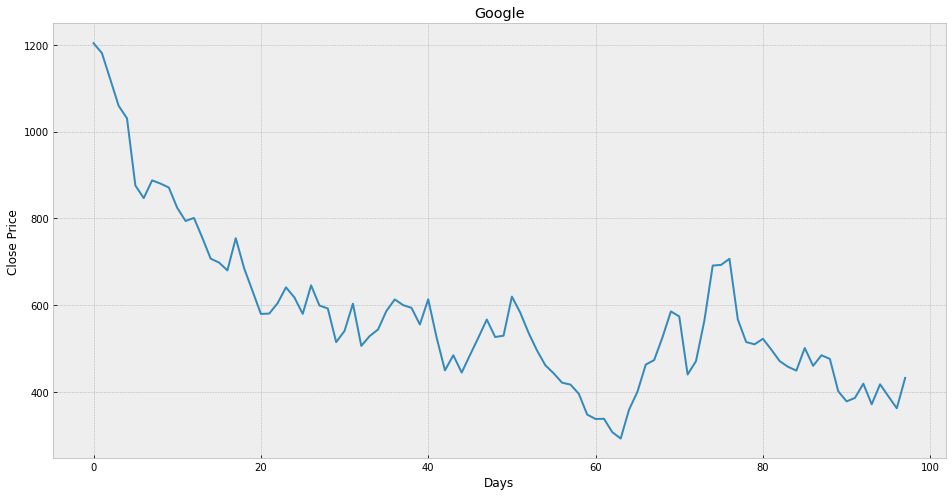

In [8]:
#Visualize close price data
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(data_frame['close'])
plt.show()

In [9]:
#Get close price
data_frame = data_frame[['close']]
data_frame.head(6)


,close
0,1203.79
1,1180.97
2,1120.71
3,1059.59
4,1030.58
5,875.91


In [13]:
#Create variable to predict 'x' days in the future
future_days = 30

#Create a new column (contains 'target' data) 
#Target data will predict price 'x' days from current price
data_frame['prediction'] = data_frame[['close']].shift(-future_days)
data_frame.head(6)


<ipython-input-13-3778ec388142>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['prediction'] = data_frame[['close']].shift(-future_days)


,close,prediction
0,1203.79,540.96
1,1180.97,603.69
2,1120.71,506.38
3,1059.59,529.02
4,1030.58,544.10
5,875.91,586.76


In [15]:
#Create the feature data set(X) and convert it to a numpy array and remove the last 'x rows/days
X = np.array(data_frame.drop(['prediction'],1))[:-future_days]
print(X)

[[1203.79]
 [1180.97]
 [1120.71]
 [1059.59]
 [1030.58]
 [ 875.91]
 [ 846.9 ]
 [ 887.75]
 [ 880.37]
 [ 871.22]
 [ 824.57]
 [ 794.19]
 [ 801.2 ]
 [ 755.69]
 [ 707.38]
 [ 698.37]
 [ 680.3 ]
 [ 754.5 ]
 [ 685.09]
 [ 632.97]
 [ 580.07]
 [ 580.86]
 [ 604.85]
 [ 641.24]
 [ 618.25]
 [ 580.11]
 [ 645.9 ]
 [ 599.39]
 [ 592.64]
 [ 515.04]
 [ 540.96]
 [ 603.69]
 [ 506.38]
 [ 529.02]
 [ 544.1 ]
 [ 586.76]
 [ 613.4 ]
 [ 600.36]
 [ 593.97]
 [ 555.71]
 [ 613.7 ]
 [ 525.79]
 [ 450.02]
 [ 484.85]
 [ 444.95]
 [ 485.63]
 [ 525.7 ]
 [ 567.12]
 [ 526.8 ]
 [ 529.94]
 [ 619.98]
 [ 583.  ]
 [ 536.12]
 [ 495.85]
 [ 461.67]
 [ 443.05]
 [ 421.59]
 [ 417.23]
 [ 395.97]
 [ 348.06]
 [ 337.99]
 [ 338.53]
 [ 307.65]
 [ 292.96]
 [ 359.36]
 [ 400.52]
 [ 463.29]
 [ 473.75]]


<ipython-input-15-175c61fa923e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data_frame.drop(['prediction'],1))[:-future_days]


In [17]:
#Create target data set (y) and convert it to numpy array and get all of the target values except the last 'x rows/days
y = np.array(data_frame['prediction'])[:-future_days]
print(y)


[540.96 603.69 506.38 529.02 544.1  586.76 613.4  600.36 593.97 555.71
 613.7  525.79 450.02 484.85 444.95 485.63 525.7  567.12 526.8  529.94
 619.98 583.   536.12 495.85 461.67 443.05 421.59 417.23 395.97 348.06
 337.99 338.53 307.65 292.96 359.36 400.52 463.29 473.75 526.42 585.8
 574.29 440.47 471.18 564.3  691.48 693.   707.   567.27 515.25 510.
 522.7  497.91 471.38 458.16 449.45 501.5  460.48 484.81 476.39 401.9
 378.53 386.6  419.33 371.82 417.94 390.   362.62 432.66]


In [22]:
#Split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [23]:
#Create models
#Create decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
li_regression = LinearRegression().fit(x_train, y_train)


In [25]:
#Get last 'x' rows of the feature data set
x_future = data_frame.drop(['prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-25-5646ee173089>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = data_frame.drop(['prediction'], 1)[:-future_days]


array([[593.97],
       [555.71],
       [613.7 ],
       [525.79],
       [450.02],
       [484.85],
       [444.95],
       [485.63],
       [525.7 ],
       [567.12],
       [526.8 ],
       [529.94],
       [619.98],
       [583.  ],
       [536.12],
       [495.85],
       [461.67],
       [443.05],
       [421.59],
       [417.23],
       [395.97],
       [348.06],
       [337.99],
       [338.53],
       [307.65],
       [292.96],
       [359.36],
       [400.52],
       [463.29],
       [473.75]])

In [27]:
#Show model tree prediction
tree_predict = tree.predict(x_future)
print(tree_predict)
print()
#Show model linear regression prediction
lr_prediction = li_regression.predict(x_future)
print(lr_prediction)

[526.42 585.8  574.29 707.   471.18 564.3  691.48 693.   707.   567.27
 515.25 510.   522.7  497.91 471.38 458.16 471.18 691.48 460.48 484.81
 476.39 386.6  386.6  386.6  419.33 371.82 417.94 476.39 432.66 432.66]

[495.13724675 489.64216285 497.97096357 485.34490957 474.46246034
 479.46491126 473.73428273 479.57693859 485.33198334 491.28092153
 485.48997059 485.94095239 498.87292716 493.56168297 486.8285535
 481.04478379 476.13568897 473.46139565 470.37920797 469.75300395
 466.69954123 459.81847824 458.37217675 458.44973413 454.01460107
 451.90475312 461.4414382  467.35303396 476.36836111 477.87067626]


<ipython-input-31-f6b79b9ccd52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


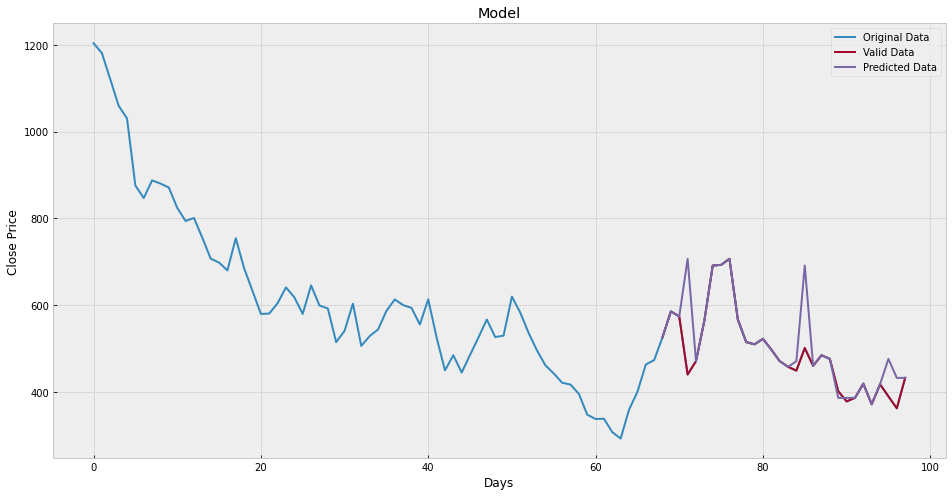

In [31]:
#Visualize data
predictions = tree_predict
valid = data_frame[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(data_frame['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Original Data', 'Valid Data','Predicted Data' ])
plt.show()

<ipython-input-33-7c24b44e80a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


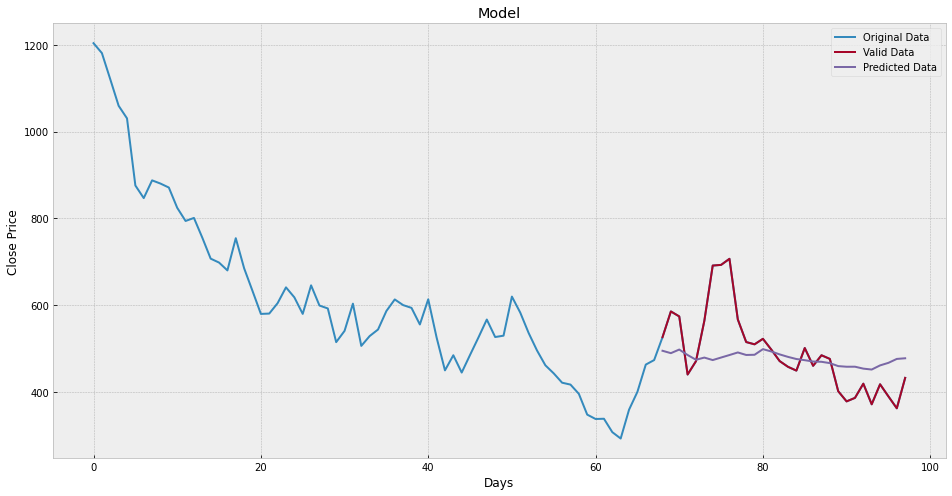

In [33]:
#Visualize data
predictions = lr_prediction
valid = data_frame[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(data_frame['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Original Data', 'Valid Data','Predicted Data' ])
plt.show()